#  AI workshop Project: Customer Churn Prediction

Data source:
https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/

- In this workshop, you will learn to use Grid Search to find the best parameters

## Prepare Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df_org = pd.read_csv("/content/drive/MyDrive/AI_Workshop_Project/train.csv")
# df_org = pd.read_csv("train.csv")

In [4]:
df = df_org.copy()
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
df.shape

(243787, 21)

In [6]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [7]:
# Iterate through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")

'AccountAge': [ 20  57  73  32 113  38  25  26  14 114   3  64  43  98  47  11  50   5
  63  55  84  16  80 116  33  86  52  77   4  91 119  72  94  99  40  60
 105  54  34  67  49 100   6  97  24  53  82  18   8  29   9 101  30  74
  17  69  61  65  96  62  35  51 109  76   2  42 111  68  15  27  58 103
  45  36  85 107 115  81 106  70  46  83  92   1  44 118  23  88   7  31
  71  48  93 117  95  37 112  21 108  19  12  78 104  87  90 110  56  79
  41  13  28  10  59  39  75 102  89  66  22]
'MonthlyCharges': [11.0552151   5.17520846 12.10665687 ... 14.51456873 18.14055532
 11.59377449]
'TotalCharges': [ 221.10430197  294.98688225  883.78595161 ... 1640.14626689  126.98388725
 1043.4397042 ]
'SubscriptionType': ['Premium' 'Basic' 'Standard']
'PaymentMethod': ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
'PaperlessBilling': ['No' 'Yes']
'ContentType': ['Both' 'Movies' 'TV Shows']
'MultiDeviceAccess': ['No' 'Yes']
'DeviceRegistered': ['Mobile' 'Tablet' 'Computer' 'TV

In [8]:
df = df.drop('CustomerID',axis=1)

## Handle Missing Data

In [9]:
df.isna().sum()/len(df)*100

AccountAge                  0.0
MonthlyCharges              0.0
TotalCharges                0.0
SubscriptionType            0.0
PaymentMethod               0.0
PaperlessBilling            0.0
ContentType                 0.0
MultiDeviceAccess           0.0
DeviceRegistered            0.0
ViewingHoursPerWeek         0.0
AverageViewingDuration      0.0
ContentDownloadsPerMonth    0.0
GenrePreference             0.0
UserRating                  0.0
SupportTicketsPerMonth      0.0
Gender                      0.0
WatchlistSize               0.0
ParentalControl             0.0
SubtitlesEnabled            0.0
Churn                       0.0
dtype: float64

## Categotical Encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [11]:
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,80.367312,47,Sci-Fi,3.697451,1,Male,8,Yes,No,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,59.818441,35,Comedy,1.449742,4,Male,20,No,No,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,176.186095,44,Action,4.012217,6,Male,13,Yes,Yes,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,153.386315,36,Fantasy,2.135789,7,Female,5,No,Yes,0


In [12]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder
SubscriptionType_encoder = LabelEncoder().fit(df['SubscriptionType'])
PaymentMethod_encoder = LabelEncoder().fit(df['PaymentMethod'])
PaperlessBilling_encoder = LabelEncoder().fit(df['PaperlessBilling'])
ContentType_encoder = LabelEncoder().fit(df['ContentType'])
MultiDeviceAccess_encoder = LabelEncoder().fit(df['MultiDeviceAccess'])
DeviceRegistered_encoder = LabelEncoder().fit(df['DeviceRegistered'])
GenrePreference_encoder = LabelEncoder().fit(df['GenrePreference'])
Gender_encoder = LabelEncoder().fit(df['Gender'])
ParentalControl_encoder = LabelEncoder().fit(df['ParentalControl'])
SubtitlesEnabled_encoder = LabelEncoder().fit(df['SubtitlesEnabled'])

In [13]:
df['SubscriptionType'] = SubscriptionType_encoder.transform(df['SubscriptionType'])
df['PaymentMethod'] = PaymentMethod_encoder.transform(df['PaymentMethod'])
df['PaperlessBilling'] = PaperlessBilling_encoder.transform(df['PaperlessBilling'])
df['ContentType'] = ContentType_encoder.transform(df['ContentType'])
df['MultiDeviceAccess'] = MultiDeviceAccess_encoder.transform(df['MultiDeviceAccess'])
df['DeviceRegistered'] = DeviceRegistered_encoder.transform(df['DeviceRegistered'])
df['GenrePreference'] = GenrePreference_encoder.transform(df['GenrePreference'])
df['Gender'] = Gender_encoder.transform(df['Gender'])
df['ParentalControl'] = ParentalControl_encoder.transform(df['ParentalControl'])
df['SubtitlesEnabled'] = SubtitlesEnabled_encoder.transform(df['SubtitlesEnabled'])


### Correlation of features  

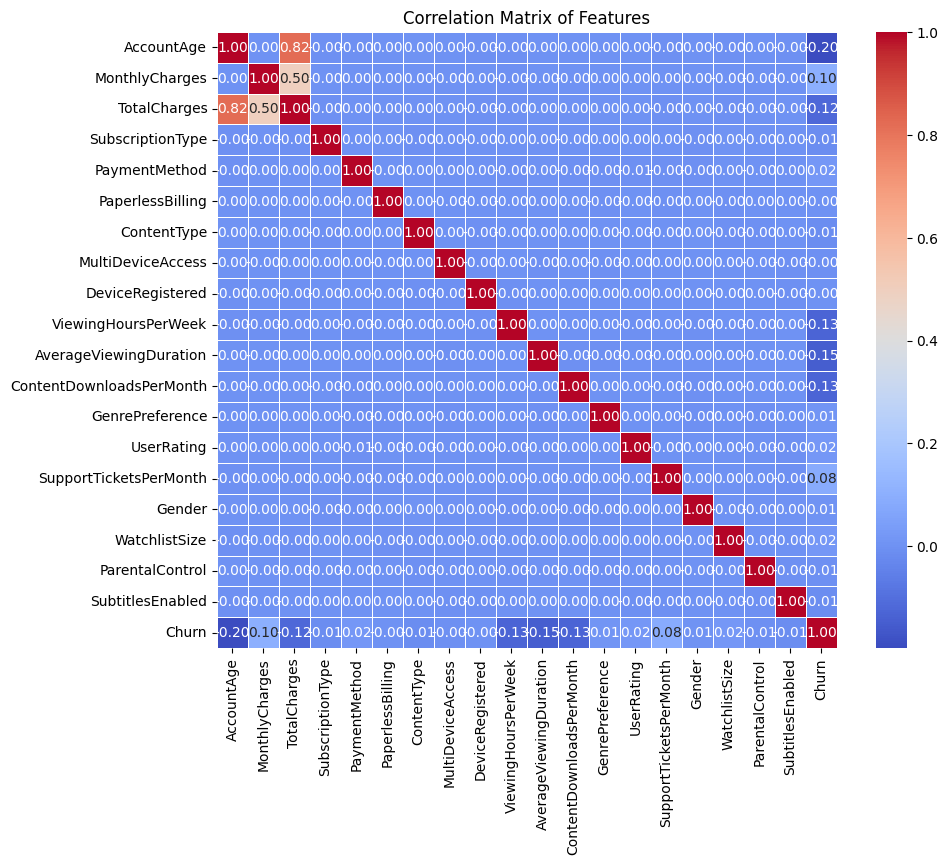

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If not, replace df with the actual name of your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Features')
plt.show()


## Select Feature and Target

In [15]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')

In [16]:
features = ['AccountAge','MonthlyCharges','TotalCharges', 'SubscriptionType', 'PaymentMethod',
            'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
            'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
            'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
            'SupportTicketsPerMonth', 'Gender', 'WatchlistSize',
            'ParentalControl', 'SubtitlesEnabled']


In [17]:
X = df[features]
y = df['Churn']

In [18]:
X.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,20,11.055215,221.104302,1,3,0,0,0,1,36.758104,63.531377,10,4,2.176498,4,1,3,0,0
1,57,5.175208,294.986882,0,1,1,1,0,3,32.450568,25.725595,18,0,3.478632,8,1,23,0,1
2,73,12.106657,883.785952,0,3,1,1,0,0,7.395160,57.364061,23,3,4.238824,6,1,1,1,1
3,32,7.263743,232.439774,0,2,0,2,0,3,27.960389,131.537507,30,2,4.276013,2,1,24,1,1
4,57,16.953078,966.325422,1,2,1,2,0,2,20.083397,45.356653,20,1,3.616170,4,0,0,0,0


### Plot in 2 Dimensions using PCA

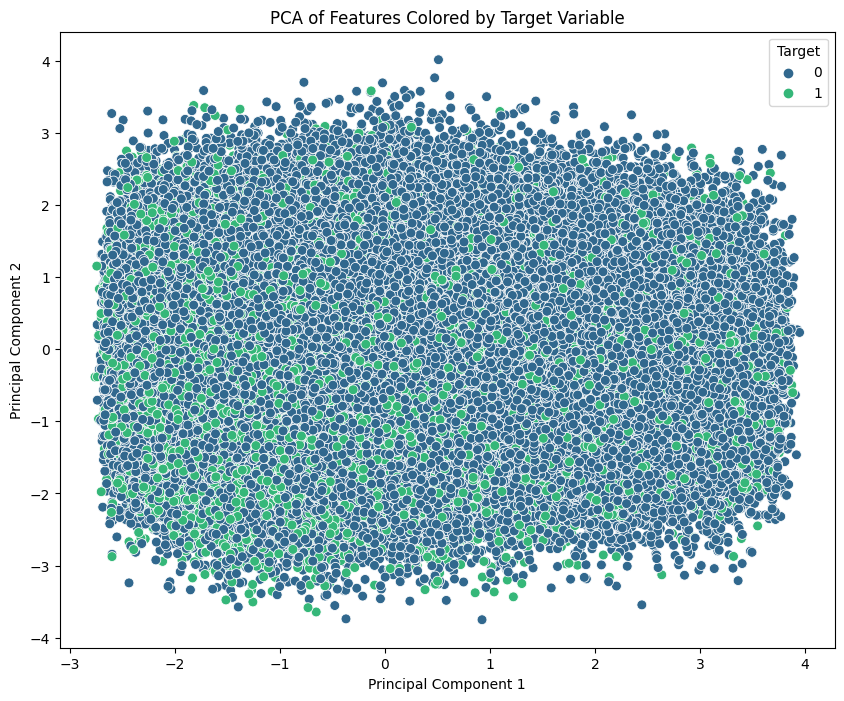

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and target variable
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'target': y})

# Plot the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=pca_df, palette='viridis', s=50)
plt.title('PCA of Features Colored by Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()

## Train/Test Data Split

In [20]:
from sklearn.model_selection import train_test_split
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Alg1: XGBoost

### Grid Search the best parameters

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('xgb', XGBClassifier(random_state=42))  # You can replace this with any other classifier
])


param_grid = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}


# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [22]:
print(best_params)
print(best_estimator)

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 150}
Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
           

### Training to Create Model with the Best Parameter

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('xgb', XGBClassifier(random_state=42, learning_rate = 0.1,max_depth=5,  n_estimators=50))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### Testing / Evaluation

              precision    recall  f1-score   support

           0     0.8302    0.9877    0.9022     39968
           1     0.5940    0.0816    0.1434      8790

    accuracy                         0.8244     48758
   macro avg     0.7121    0.5347    0.5228     48758
weighted avg     0.7876    0.8244    0.7654     48758



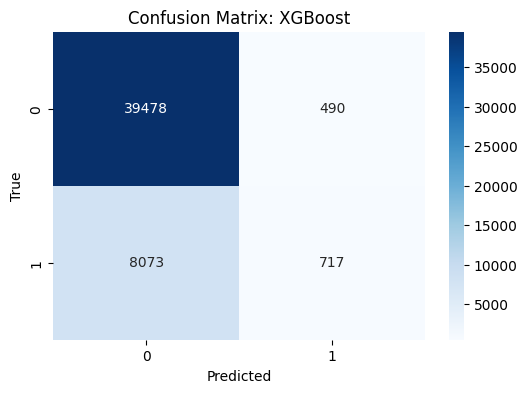

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_xgb.png')

plt.show()

## Alg2: RandomForest

### Grid Search the best parameters

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('rf', RandomForestClassifier(random_state=42))  # You can replace this with any other classifier
])

param_grid = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__max_depth': [None, 10, 20],
}


# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [26]:
print(best_params)
print(best_estimator)

{'rf__max_depth': 20, 'rf__n_estimators': 1000}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=1000,
                                        random_state=42))])


### Training to Create Model with the Best Parameter

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('rf', RandomForestClassifier(random_state=42, max_depth=10, n_estimators=1000))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, n_estimators=1000,
                                        random_state=42))])

### Testing / Evaluation

              precision    recall  f1-score   support

           0     0.8242    0.9953    0.9017     39968
           1     0.6182    0.0348    0.0659      8790

    accuracy                         0.8221     48758
   macro avg     0.7212    0.5150    0.4838     48758
weighted avg     0.7871    0.8221    0.7510     48758



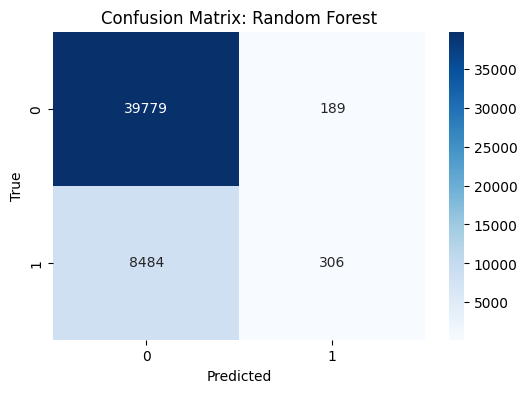

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_randforest.png')

plt.show()

## Alg3: Decision Tree

### Grid Search the best parameters

In [32]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with StandardScaler (for feature scaling) and Multinomial Naive Bayes
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Criterion for splitting
    'classifier__max_depth': [None, 5, 10, 15],     # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10]     # Minimum number of samples required to split an internal node
}

# Create GridSearchCV object with a fixed random_state
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best estimator and print the best hyperparameters
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

In [33]:
print(best_params)
print(best_estimator)

{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=1000,
                                        random_state=42))])


### Training to Create Model with the Best Parameter

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Naive Bayes classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Testing / Evaluation

              precision    recall  f1-score   support

           0     0.8411    0.8202    0.8305     39968
           1     0.2656    0.2957    0.2798      8790

    accuracy                         0.7256     48758
   macro avg     0.5534    0.5579    0.5552     48758
weighted avg     0.7374    0.7256    0.7313     48758



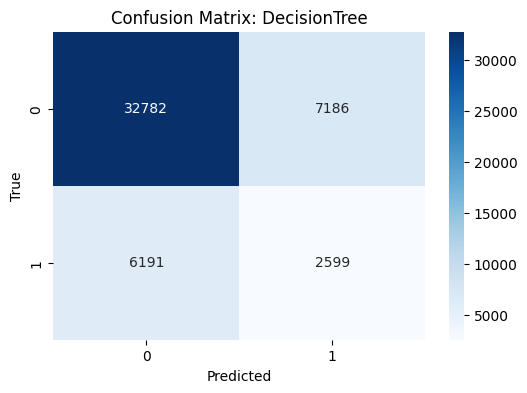

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.title('Confusion Matrix: DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_DecisionTree.png')

plt.show()

## Select the Best Model to Create on All Data, i.e., (X,y), and Save Model


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('xgb', XGBClassifier(random_state=42, learning_rate = 0.1,max_depth=5,  n_estimators=50))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [37]:
import pickle
# Create a tuple or any container object with your variables
data_to_save = (model, SubscriptionType_encoder, PaymentMethod_encoder, PaperlessBilling_encoder, MultiDeviceAccess_encoder, DeviceRegistered_encoder,
                GenrePreference_encoder, Gender_encoder, ParentalControl_encoder, SubtitlesEnabled_encoder)

# Open a file in binary write mode
with open('model_CustomerChurn.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

### Load model

In [1]:
import pickle
import pandas as pd

with open('model_CustomerChurn.pkl', 'rb') as file:
    # Load the data from the file
    model, SubscriptionType_encoder, PaymentMethod_encoder, PaperlessBilling_encoder, MultiDeviceAccess_encoder, DeviceRegistered_encoder,GenrePreference_encoder, Gender_encoder, ParentalControl_encoder, SubtitlesEnabled_encoder = pickle.load(file)



### New data

In [ ]:
# Get user input for each variable
x_new =  pd.DataFrame()
x_new['department'] = ['Technology']
x_new['region'] = ['region_26']
x_new['education'] = ['Bachelors']
x_new['gender'] = ['m']
x_new['recruitment_channel'] = ['sourcing']
x_new['no_of_trainings'] = [1]
x_new['age'] = [24]
x_new['previous_year_rating'] = [2]
x_new['length_of_service'] = [1]
x_new['awards_won'] = [0]
x_new['avg_training_score'] = [77]

### Categorical Data Encoding

In [ ]:
x_new['department'] = department_encoder.transform(x_new['department'])
x_new['region'] = region_encoder.transform(x_new['region'])
x_new['education'] = education_encoder.transform(x_new['education'])
x_new['gender'] = gender_encoder.transform(x_new['gender'])
x_new['recruitment_channel'] = recruitment_channel_encoder.transform(x_new['recruitment_channel'])

### Predicting

In [ ]:
y_pred_new = model.predict(x_new)

result = y_pred_new

print('Customer Churn: ', result)

## Create file app_KPI.py


In [ ]:
%%writefile app_CustomerChurn.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load model and encoders
with open('model_CustomerChurn.pkl', 'rb') as file:
    model, department_encoder, region_encoder, education_encoder, gender_encoder, recruitment_channel_encoder = pickle.load(file)

# Load your DataFrame
# Replace 'your_data.csv' with the actual file name or URL
df = pd.read_csv('Uncleaned_employees_final_dataset.csv')
df = df.drop('employee_id', axis=1)

# Streamlit App
st.title('Employee KPIs App')

# Define a session state to remember tab selections
if 'tab_selected' not in st.session_state:
    st.session_state.tab_selected = 0

# Create tabs for prediction and visualization
tabs = ['Predict KPIs', 'Visualize Data', 'Predict from CSV']
selected_tab = st.radio('Select Tab:', tabs, index=st.session_state.tab_selected)

# Tab selection logic
if selected_tab != st.session_state.tab_selected:
    st.session_state.tab_selected = tabs.index(selected_tab)

# Tab 1: Predict KPIs
if st.session_state.tab_selected == 0:
    st.header('Predict KPIs')

    # User Input Form
    department = st.selectbox('Department', department_encoder.classes_)
    region = st.selectbox('Region', region_encoder.classes_)
    education = st.selectbox('Education', education_encoder.classes_)
    gender = st.radio('Gender', gender_encoder.classes_)
    recruitment_channel = st.selectbox('Recruitment Channel', recruitment_channel_encoder.classes_)
    no_of_trainings = st.slider('Number of Trainings', 1, 10, 1)
    age = st.slider('Age', 18, 60, 30)
    previous_year_rating = st.slider('Previous Year Rating', 1.0, 5.0, 3.0)
    length_of_service = st.slider('Length of Service', 1, 20, 5)
    awards_won = st.checkbox('Awards Won')
    avg_training_score = st.slider('Average Training Score', 40, 100, 70)

    # Create a DataFrame for the user input
    user_input = pd.DataFrame({
        'department': [department],
        'region': [region],
        'education': [education],
        'gender': [gender],
        'recruitment_channel': [recruitment_channel],
        'no_of_trainings': [no_of_trainings],
        'age': [age],
        'previous_year_rating': [previous_year_rating],
        'length_of_service': [length_of_service],
        'awards_won': [1 if awards_won else 0],
        'avg_training_score': [avg_training_score]
    })

    # Categorical Data Encoding
    user_input['department'] = department_encoder.transform(user_input['department'])
    user_input['region'] = region_encoder.transform(user_input['region'])
    user_input['education'] = education_encoder.transform(user_input['education'])
    user_input['gender'] = gender_encoder.transform(user_input['gender'])
    user_input['recruitment_channel'] = recruitment_channel_encoder.transform(user_input['recruitment_channel'])

    # Predicting
    prediction = model.predict(user_input)

    # Display Result
    st.subheader('Prediction Result:')
    st.write('KPIs_met_more_than_80:', prediction[0])

# Tab 2: Visualize Data
elif st.session_state.tab_selected == 1:
    st.header('Visualize Data')

    # Select condition feature
    condition_feature = st.selectbox('Select Condition Feature:', df.columns)

    # Set default condition values
    default_condition_values = ['Select All'] + df[condition_feature].unique().tolist()

    # Select condition values
    condition_values = st.multiselect('Select Condition Values:', default_condition_values)

    # Handle 'Select All' choice
    if 'Select All' in condition_values:
        condition_values = df[condition_feature].unique().tolist()

    if len(condition_values) > 0:
        # Filter DataFrame based on selected condition
        filtered_df = df[df[condition_feature].isin(condition_values)]

        # Plot the number of employees based on KPIs
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.countplot(x=condition_feature, hue='KPIs_met_more_than_80', data=filtered_df, palette='viridis')
        plt.title('Number of Employees based on KPIs')
        plt.xlabel(condition_feature)
        plt.ylabel('Number of Employees')
        st.pyplot(fig)

# Tab 3: Predict from CSV
elif st.session_state.tab_selected == 2:
    st.header('Predict from CSV')

    # Upload CSV file
    uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])
    # uploaded_file

    if uploaded_file is not None:
        # Read CSV file
        csv_df_org = pd.read_csv(uploaded_file)
        csv_df_org = csv_df_org.dropna()
        # csv_df_org.columns

        csv_df = csv_df_org.copy()
        csv_df = csv_df.drop('employee_id',axis=1)



         # Categorical Data Encoding
        csv_df['department'] = department_encoder.transform(csv_df['department'])
        csv_df['region'] = region_encoder.transform(csv_df['region'])
        csv_df['education'] = education_encoder.transform(csv_df['education'])
        csv_df['gender'] = gender_encoder.transform(csv_df['gender'])
        csv_df['recruitment_channel'] = recruitment_channel_encoder.transform(csv_df['recruitment_channel'])


        # Predicting
        predictions = model.predict(csv_df)

        # Add predictions to the DataFrame
        csv_df_org['KPIs_met_more_than_80'] = predictions

        # Display the DataFrame with predictions
        st.subheader('Predicted Results:')
        st.write(csv_df_org)

        # Visualize predictions based on a selected feature
        st.subheader('Visualize Predictions')

        # Select feature for visualization
        feature_for_visualization = st.selectbox('Select Feature for Visualization:', csv_df_org.columns)

        # Plot the number of employees based on KPIs for the selected feature
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.countplot(x=feature_for_visualization, hue='KPIs_met_more_than_80', data=csv_df_org, palette='viridis')
        plt.title(f'Number of Employees based on KPIs - {feature_for_visualization}')
        plt.xlabel(feature_for_visualization)
        plt.ylabel('Number of Employees')
        st.pyplot(fig)



## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [ ]:
%%writefile requirements.txt

scikit-learn==1.2.2
pandas
xgboost